## Python Modules

In [1]:
import os
import pandas as pd
import numpy as np
import ast

from unidecode import unidecode
from collections import Counter

import plotly.graph_objs as go
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

## Transform dataset

In [8]:
file_fw = os.path.join('data', 'processed', 'dataset_fw.csv')

def parse_array_string(array_string):
    try:
        return ast.literal_eval(array_string)
    except ValueError:
        return []

dataset_fw = pd.read_csv(file_fw, converters={'data_tokenized': parse_array_string})
dataset_fw['Fecha_Publicacion'] = pd.to_datetime(dataset_fw['Fecha_Publicacion'])

print(dataset_fw.head())

    Fecha_Publicacion                                     data_tokenized
0 2024-01-20 12:32:00  [anuncio, invertirar, 516, obra, infraestructu...
1 2024-01-05 05:59:00  [conversacion, narcotraficante, leandro, norer...
2 2023-12-11 15:26:00  [agencia, regulacion, control, fito, zoosanita...
3 2023-08-26 16:59:00  [incautar, 501, tonelada, droga, ultimo, 27, m...
4 2023-05-09 16:41:00  [despu, cinco, dictar, sentencia, caso, odebre...


In [9]:
words_day = dataset_fw.groupby([dataset_fw['Fecha_Publicacion'].dt.year, dataset_fw['Fecha_Publicacion'].dt.month])['data_tokenized'].sum()

## Word frequency

### Diario

In [10]:
dataset_fw_day = dataset_fw.copy()
dataset_fw_day.set_index('Fecha_Publicacion', inplace=True)

## Division por Day
# grouped_data_day = dataset_fw_day.resample('D')['data_tokenized'].sum()
grouped_data_day = dataset_fw_day.resample('D')['data_tokenized'].agg(lambda x: sum(x, []) if all(isinstance(i, list) for i in x) else [])


### Semanal

In [11]:
dataset_fw_week = dataset_fw.copy()
dataset_fw_week.set_index('Fecha_Publicacion', inplace=True)

## Division por Week
grouped_data_week = dataset_fw_week.resample('W')['data_tokenized'].sum()

### Mensual

In [12]:
dataset_fw_month = dataset_fw.copy()
dataset_fw_month.set_index('Fecha_Publicacion', inplace=True)

## Division por Month
# ME o M dependiendo de la version
grouped_data_month = dataset_fw_month.resample('M')['data_tokenized'].sum() 

C:\Users\Alexis\AppData\Local\Temp\ipykernel_16780\2105302968.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped_data_month = dataset_fw_month.resample('M')['data_tokenized'].sum()


### Trimestral

In [29]:
dataset_fw_3m = dataset_fw.copy()
dataset_fw_3m.set_index('Fecha_Publicacion', inplace=True)

## Division por quarterly
# QE o 3M dependiendo de la version
grouped_data_3m = dataset_fw_3m.resample('3M')['data_tokenized'].sum()

C:\Users\Alexis\AppData\Local\Temp\ipykernel_1196\30653298.py:6: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



## Frequency

In [ ]:
## Barras Horizontales
for (year, month), data_tokenized in words_day.items():
    print(f'Year: {year}, Month: {month}')
    
    word_counts = Counter(data_tokenized)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    idx_start  = 0
    idx_finish = 30
    top_words  = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    colors = [count for word, count in sorted_word_counts.items()]
    
    fig = go.Figure(go.Bar(
        y = list(top_words.keys()),
        x = list(top_words.values()),
        orientation='h',  # Horizontal
        marker=dict(color=list(top_words.values()), colorscale='greens')
    ))

    fig.update_layout(
        title = f'Top {idx_finish-idx_start} Word Frequency - Year: {year}, Month: {month}',
        xaxis_title = 'Frequency',
        yaxis_title = 'Words',
        yaxis  = dict(autorange="reversed"), 
        height = max(600, len(top_words) * 25) 
    )

    fig.show()

In [ ]:
## Barras verticales
idx_start  = 0
idx_finish = 50

for period, data_tokenized in grouped_data_day.items():
    year  = period.year
    month = period.month
    day   = period.day
    
    print(f'Year: {year}, Month: {month}, Day: {day}')
    
    word_counts = Counter(data_tokenized)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    top_words = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    
    fig = go.Figure(data=[go.Bar(
        x=list(top_words.keys()),
        y=list(top_words.values()),
        marker=dict(
            color=list(top_words.values()),
            coloraxis='coloraxis' 
        ),
    )])
    
    fig.update_layout(
        title=f'Top {idx_finish-idx_start} Word Frequency - Year: {year}, Month: {month}, Day: {day}',
        xaxis=dict(
            title='Words',
            tickangle=-45 
        ),
        yaxis=dict(title='Frequency'),
        coloraxis=dict(
            colorbar=dict(
                title='Frecuencia'
            ),
            colorscale='Plasma' 
        ),
        template='plotly_white',
        #margin=dict(l=50, r=50, t=100, b=150)  # Ajustar márgenes
    )
    
    fig.show()

In [ ]:
## Barras verticales
idx_start  = 0
idx_finish = 50

for period, data_tokenized in grouped_data_week.items():
    year = period.year
    month = period.month
    week  = period.isocalendar()[1]
    #week = period.week
    
    print(f'Year: {year}, Month: {month}, Week: {week}')
    
    word_counts = Counter(data_tokenized)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    top_words = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    
    fig = go.Figure(data=[go.Bar(
        x=list(top_words.keys()),
        y=list(top_words.values()),
        marker=dict(
            color=list(top_words.values()),
            coloraxis='coloraxis' 
        ),
    )])
    
    fig.update_layout(
        title=f'Top {idx_finish-idx_start} Word Frequency - Year: {year}, Month: {month}, Week: {week}',
        xaxis=dict(
            title='Words',
            tickangle=-45 
        ),
        yaxis=dict(title='Frequency'),
        coloraxis=dict(
            colorbar=dict(
                title='Frecuencia'
            ),
            colorscale='Plasma' 
        ),
        template='plotly_white',
        #margin=dict(l=50, r=50, t=100, b=150)  # Ajustar márgenes
    )
    
    fig.show()

In [ ]:
## Barras verticales
idx_start  = 0
idx_finish = 50

for period, data_tokenized in grouped_data_month.items():
    year = period.year
    month = period.month

    print(f'Year: {year}, Month: {month}')
    
    word_counts = Counter(data_tokenized)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    top_words = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    
    fig = go.Figure(data=[go.Bar(
        x=list(top_words.keys()),
        y=list(top_words.values()),
        marker=dict(
            color=list(top_words.values()),
            coloraxis='coloraxis' 
        ),
    )])
    
    fig.update_layout(
        title=f'Top {idx_finish-idx_start} Word Frequency - Year: {year}, Month: {month}',
        xaxis=dict(
            title='Words',
            tickangle=-45 
        ),
        yaxis=dict(title='Frequency'),
        coloraxis=dict(
            colorbar=dict(
                title='Frecuencia'
            ),
            colorscale='Plasma' 
        ),
        template='plotly_white',
        #margin=dict(l=50, r=50, t=100, b=150)  # Ajustar márgenes
    )
    
    fig.show()

In [ ]:
## Barras verticales
idx_start  = 0
idx_finish = 50

for period, data_tokenized in grouped_data_3m.items():
    year = period.year
    quarter = period.quarter
    
    print(f'Year: {year}, Quarter: {quarter}')

    word_counts = Counter(data_tokenized)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    top_words = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    
    fig = go.Figure(data=[go.Bar(
        x=list(top_words.keys()),
        y=list(top_words.values()),
        marker=dict(
            color=list(top_words.values()),
            coloraxis='coloraxis' 
        ),
    )])
    
    fig.update_layout(
        title=f'Top {idx_finish-idx_start} Word Frequency - Year: {year}, Quarter: {quarter}',
        xaxis=dict(
            title='Words',
            tickangle=-45 
        ),
        yaxis=dict(title='Frequency'),
        coloraxis=dict(
            colorbar=dict(
                title='Frecuencia'
            ),
            colorscale='Plasma' 
        ),
        template='plotly_white',
        #margin=dict(l=50, r=50, t=100, b=150)  # Ajustar márgenes
    )
    
    fig.show()

## Frequency of word

In [ ]:
query_word = 'luz'
frecuencias_por_dia = []

for data_tokenized in grouped_data_day:
    if isinstance(data_tokenized, list):  # Verificar que sea una lista
        word_counts = Counter(data_tokenized)
        frecuencias_por_dia.append(word_counts[query_word])
    else:
        frecuencias_por_dia.append(0)

# Normalizar los colores en base a la frecuencia max
max_frecuencia = max(frecuencias_por_dia)
colors = [frecuencia / max_frecuencia for frecuencia in frecuencias_por_dia]

fig = go.Figure()
fig.add_trace(go.Bar(
    x=grouped_data_day.index,
    y=frecuencias_por_dia,
    marker=dict(
        color=frecuencias_por_dia,
        colorscale='Viridis', 
        colorbar=dict(title='Frecuencia')
    ),
))

fig.update_layout(
    title=f'Frecuencia de "{query_word}" por día',
    xaxis_title='Día',
    yaxis_title='Frecuencia',
    xaxis=dict(tickangle=45),
)

fig.show()

In [8]:
query_word = 'luz'
frecuencias_por_semana = []

for period, data_tokenized in grouped_data_week.items():
    word_counts = Counter(data_tokenized)
    if query_word in word_counts:
        frecuencias_por_semana.append(word_counts[query_word])
    else:
        frecuencias_por_semana.append(0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[period.strftime('%Y-%m-%d') for period in grouped_data_week.keys()],
    y=frecuencias_por_semana,
    marker=dict(
        color=frecuencias_por_semana,
        colorscale='Viridis',
        colorbar=dict(title='Frecuencia')
    ),
))

fig.update_layout(
    title=f'Frecuencia de "{query_word}" por semana',
    xaxis_title='Semana',
    yaxis_title='Frecuencia',
    xaxis=dict(tickangle=45),
)

fig.show()

In [ ]:
query_word = 'luz'
frecuencias_por_mes = []

if len(grouped_data_month) > 0:
    for period, data_tokenized in grouped_data_month.items():
        word_counts = Counter(data_tokenized)
        if query_word in word_counts:
            frecuencias_por_mes.append(word_counts[query_word])
        else:
            frecuencias_por_mes.append(0)

    # Crear el gráfico de barras verticales con colores diferentes para cada mes
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=[period.strftime('%Y-%m') for period in grouped_data_month.keys()],
        y=frecuencias_por_mes,
        marker=dict(
            color=frecuencias_por_mes,
            colorscale='Viridis',
            colorbar=dict(title='Frecuencia')
        ),
    ))

    # Actualizar el diseño del gráfico
    fig.update_layout(
        title=f'Frecuencia de "{query_word}" por mes',
        xaxis_title='Mes',
        yaxis_title='Frecuencia',
        xaxis=dict(tickangle=45),
    )

    fig.show()
else:
    print("No hay suficientes datos")

In [ ]:
query_word = 'luz'
frecuencias_por_trimestre = []

for period, data_tokenized in grouped_data_3m.items():
    word_counts = Counter(data_tokenized)
    if query_word in word_counts:
        frecuencias_por_trimestre.append(word_counts[query_word])
    else:
        frecuencias_por_trimestre.append(0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=[period.strftime('%Y-%m-%d') for period in grouped_data_3m.keys()],
    y=frecuencias_por_trimestre,
    marker=dict(
        color=frecuencias_por_trimestre,
        colorscale='Viridis',  # Cambiar el esquema de color si se desea
        colorbar=dict(title='Frecuencia')
    ),
))

fig.update_layout(
    title=f'Frecuencia de "{query_word}" por trimestre',
    xaxis_title='Trimestre',
    yaxis_title='Frecuencia',
    xaxis=dict(tickangle=45),
)

fig.show()

In [ ]:

for period, data_tokenized in grouped_data_3m.items():
    print(f'Periodo: {period}')

    word_counts = Counter()
    for tokens in data_tokenized:
        if isinstance(tokens, str):
            words = tokens.split() 
            word_counts.update(words) 
        elif isinstance(tokens, list): 
            word_counts.update(tokens)  

    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    idx_start = 0
    idx_finish = 10
    top_words = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    print(top_words)

In [ ]:

for period, data_tokenized in grouped_data_week.items():
    print(f'Periodo: {period}')

    word_counts = Counter()
    for tokens in data_tokenized:
        if isinstance(tokens, str):
            words = tokens.split()
            word_counts.update(words)
        elif isinstance(tokens, list):
            word_counts.update(tokens) 

    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    idx_start = 5
    idx_finish = 10
    top_words = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    print(top_words)

In [ ]:

for period, data_tokenized in grouped_data_month.items():
    print(f'Periodo: {period}')

    word_counts = Counter()
    for tokens in data_tokenized:
        if isinstance(tokens, str): 
            words = tokens.split()  
            word_counts.update(words)  # Actualizar el contador con las palabras
        elif isinstance(tokens, list):  # Si los tokens son una lista
            word_counts.update(tokens) 

    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    idx_start = 6
    idx_finish = 15
    top_words = dict(list(sorted_word_counts.items())[idx_start:idx_finish])
    print(top_words)

## Long Tail

In [ ]:
# pip install powerlaw

Calculating best minimal value for power law fit
Diariorogress: 99%
Total: 74958
Num_head: 27806 (37.10%)
Num_tail: 47152 (62.90%)
Head[20]: [('guayaquil', 11659), ('policia', 10063), ('seguridad', 9770), ('presidente', 9590), ('empresa', 9187), ('caso', 8332), ('primero', 8156), ('quito', 8065), ('internacional', 7941), ('tres', 7262), ('feriado', 7212), ('tras', 7198), ('parte', 6830), ('sector', 6712), ('llegar', 6238), ('dejar', 6084), ('proceso', 6040), ('ecuatoriano', 5828), ('mayo', 5706), ('ir', 5631)]



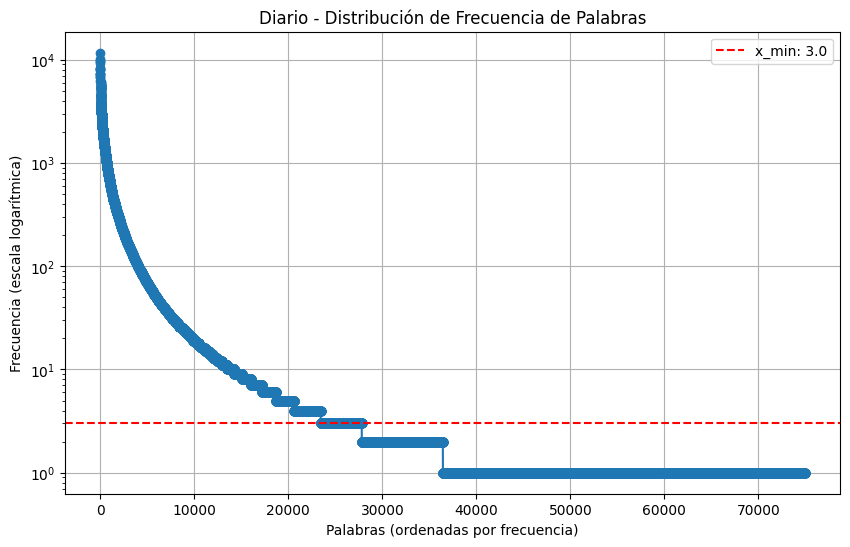

Calculating best minimal value for power law fit
Semanalogress: 99%
Total: 74958
Num_head: 27806 (37.10%)
Num_tail: 47152 (62.90%)
Head[20]: [('guayaquil', 11659), ('policia', 10063), ('seguridad', 9770), ('presidente', 9590), ('empresa', 9187), ('caso', 8332), ('primero', 8156), ('quito', 8065), ('internacional', 7941), ('tres', 7262), ('feriado', 7212), ('tras', 7198), ('parte', 6830), ('sector', 6712), ('llegar', 6238), ('dejar', 6084), ('proceso', 6040), ('ecuatoriano', 5828), ('mayo', 5706), ('ir', 5631)]



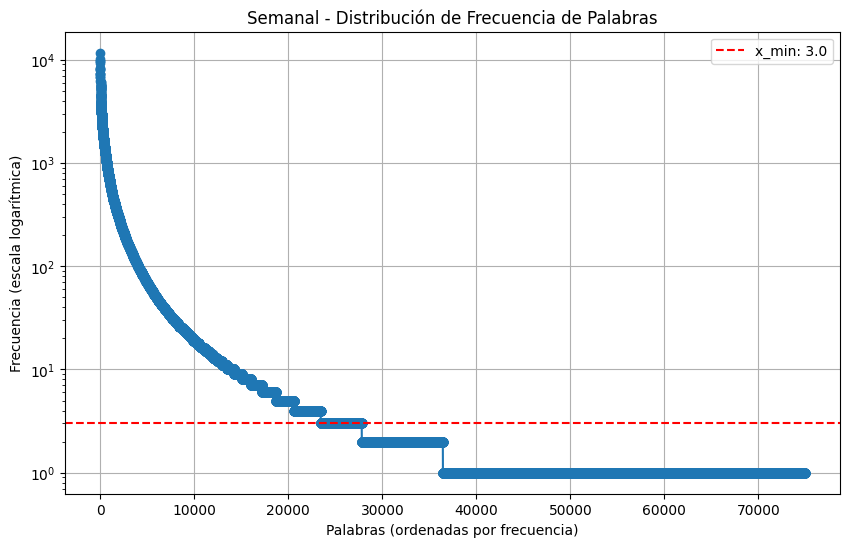

Calculating best minimal value for power law fit
Mensualogress: 99%
Total: 74958
Num_head: 27806 (37.10%)
Num_tail: 47152 (62.90%)
Head[20]: [('guayaquil', 11659), ('policia', 10063), ('seguridad', 9770), ('presidente', 9590), ('empresa', 9187), ('caso', 8332), ('primero', 8156), ('quito', 8065), ('internacional', 7941), ('tres', 7262), ('feriado', 7212), ('tras', 7198), ('parte', 6830), ('sector', 6712), ('llegar', 6238), ('dejar', 6084), ('proceso', 6040), ('ecuatoriano', 5828), ('mayo', 5706), ('ir', 5631)]



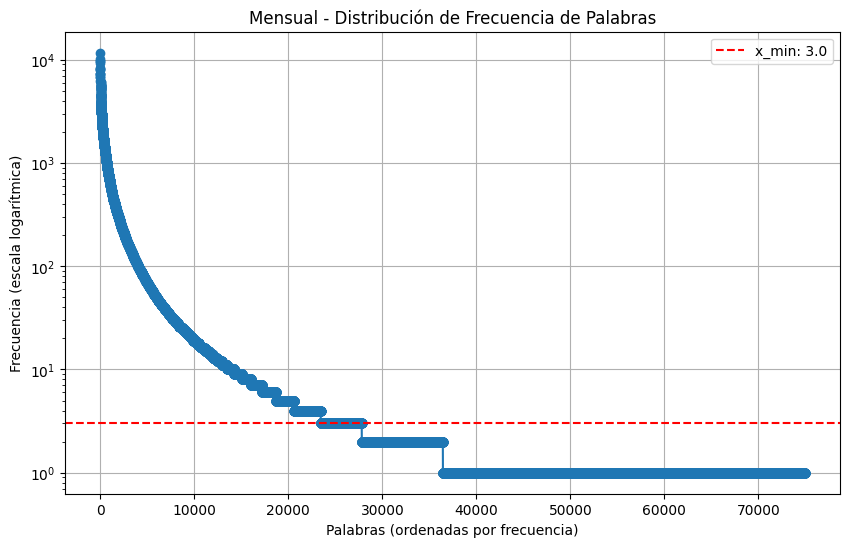

Calculating best minimal value for power law fit
Trimestraless: 99%
Total: 74958
Num_head: 27806 (37.10%)
Num_tail: 47152 (62.90%)
Head[20]: [('guayaquil', 11659), ('policia', 10063), ('seguridad', 9770), ('presidente', 9590), ('empresa', 9187), ('caso', 8332), ('primero', 8156), ('quito', 8065), ('internacional', 7941), ('tres', 7262), ('feriado', 7212), ('tras', 7198), ('parte', 6830), ('sector', 6712), ('llegar', 6238), ('dejar', 6084), ('proceso', 6040), ('ecuatoriano', 5828), ('mayo', 5706), ('ir', 5631)]



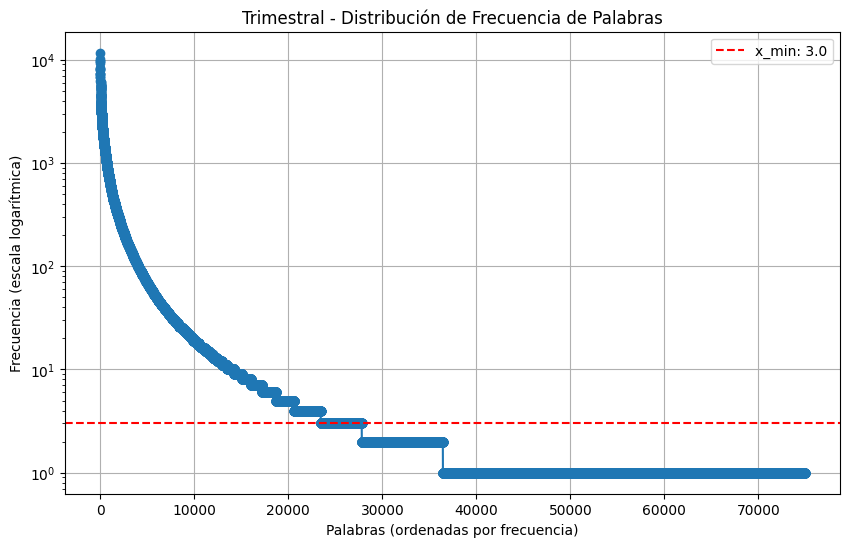

In [9]:
import powerlaw

def analyze_long_tail(data, title):
    counter = Counter(data)
    sorted_words = sorted(counter.items(), key=lambda item: item[1], reverse=True)
    frequencies  = np.array([freq for word, freq in sorted_words])
    
    fit = powerlaw.Fit(frequencies)
    x_min = fit.power_law.xmin   # Punto de corte calculado
    alpha = fit.power_law.alpha  # Exponente de ley de potencias

    head_words = [(word, freq) for word, freq in sorted_words if freq >= x_min]
    tail_words = [(word, freq) for word, freq in sorted_words if freq < x_min]

    head_count = len(head_words)
    tail_count = len(tail_words)
    
    num_words = 20 # num_words to print
    print(f"{title}")
    print(f"Total: {len(sorted_words)}")
    print(f"Num_head: {head_count} ({head_count / len(sorted_words):.2%})")
    print(f"Num_tail: {tail_count} ({tail_count / len(sorted_words):.2%})")
    print(f"Head[{num_words}]: {head_words[:num_words]}") 
    print()
    
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, marker='o')
    plt.axhline(y=x_min, color='r', linestyle='--', label=f'x_min: {x_min}')
    plt.yscale('log')
    plt.title(f'{title} - Distribución de Frecuencia de Palabras')
    plt.xlabel('Palabras (ordenadas por frecuencia)')
    plt.ylabel('Frecuencia (escala logarítmica)')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    #print(f'Ajuste de ley de potencias con alfa: {alpha}, x_min: {x_min}')
    return head_words, tail_words

data_d = [word for day_data in grouped_data_day if isinstance(day_data, list) for word in day_data]
data_w = [word for week_data in grouped_data_week for word in week_data]
data_m = [word for month_data in grouped_data_month for word in month_data]
data_q = [word for quarter_data in grouped_data_3m for word in quarter_data]


head_words_d, tail_words_d = analyze_long_tail(data_d, 'Diario')
head_words_w, tail_words_w = analyze_long_tail(data_w, 'Semanal')
head_words_m, tail_words_m = analyze_long_tail(data_m, 'Mensual')
head_words_q, tail_words_q = analyze_long_tail(data_q, 'Trimestral')

# Jaccard

In [30]:
def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    similarity = len(intersection) / len(union)
    distance = 1 - similarity
    return similarity

In [31]:
# dia a dia
jaccard_indices_day = []
dias = []

prev_day_words = None
prev_period = None

for period, data_tokenized in grouped_data_day.items():
    if not isinstance(data_tokenized, list):
        continue 
    
    word_counts = Counter(data_tokenized)
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))
    idx_start = 10
    idx_finish = 20
    current_day_words = set(list(sorted_word_counts.keys())[idx_start:idx_finish])
    
    if prev_day_words is not None:
        jaccard_index = jaccard_similarity(prev_day_words, current_day_words)
        jaccard_indices_day.append(jaccard_index)
        dias.append(f'{prev_period.strftime("%Y-%m-%d")} - {period.strftime("%Y-%m-%d")}')
    
    prev_day_words = current_day_words
    prev_period = period

num_res = 10
for dia, jaccard_index in zip(dias[:num_res], jaccard_indices_day[:num_res]):
    print(f'{dia}: {jaccard_index}')

2021-11-01 - 2021-11-02: 0.0
2021-11-02 - 2021-11-03: 0.05263157894736842
2021-11-03 - 2021-11-04: 0.0
2021-11-04 - 2021-11-05: 0.0
2021-11-05 - 2021-11-06: 0.0
2021-11-06 - 2021-11-07: 0.0
2021-11-07 - 2021-11-08: 0.05263157894736842
2021-11-08 - 2021-11-09: 0.0
2021-11-09 - 2021-11-10: 0.05263157894736842
2021-11-10 - 2021-11-11: 0.0


In [32]:
# semana a semana
jaccard_indices_week = []
semanas = []

prev_week_words = None
prev_period = None

for period, data_tokenized in grouped_data_week.items():
    word_counts_current = Counter()
    for tokens in data_tokenized:
        if isinstance(tokens, str):  # Si los tokens son una cadena de texto
            words = tokens.split()  # Dividir la cadena en palabras
            word_counts_current.update(words)  # Actualizar el contador con las palabras
        elif isinstance(tokens, list):  # Si los tokens son una lista
            word_counts_current.update(tokens)  # Actualizar el contador directamente

    sorted_word_counts = dict(sorted(word_counts_current.items(), key=lambda item: item[1], reverse=True))
    idx_start = 10
    idx_finish = 20
    current_week_words = set(list(sorted_word_counts.keys())[idx_start:idx_finish])

    if prev_week_words is not None:
        jaccard_index = jaccard_similarity(prev_week_words, current_week_words)
        jaccard_indices_week.append(jaccard_index)
        semanas.append(f'{prev_period.strftime("%Y-%W")} - {period.strftime("%Y-%W")}')

    prev_week_words = current_week_words
    prev_period = period

# Graficar el índice de Jaccard semana a semana con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=semanas,
    y=jaccard_indices_week,
    mode='lines+markers',
    marker=dict(size=10),
    line=dict(width=2),
    name='Índice de Jaccard'
))

fig.update_layout(
    title='Índice de Jaccard Semana a Semana',
    xaxis_title='Fechas',
    yaxis_title='Índice de Jaccard',
    xaxis_tickangle=-45,
    xaxis_tickformat='%Y-%W',
    xaxis=dict(tickmode='array', tickvals=semanas),
    yaxis=dict(range=[0, 1]),
    showlegend=True
)

fig.show()

In [33]:
# Calcular el índice de Jaccard mes a mes
jaccard_indices_month = []
meses = []

prev_month_words = None
prev_period = None

for period, data_tokenized in grouped_data_month.items():
    word_counts_current = Counter()
    for tokens in data_tokenized:
        if isinstance(tokens, str):  # Si los tokens son una cadena de texto
            words = tokens.split()  # Dividir la cadena en palabras
            word_counts_current.update(words)  # Actualizar el contador con las palabras
        elif isinstance(tokens, list):  # Si los tokens son una lista
            word_counts_current.update(tokens)  # Actualizar el contador directamente

    sorted_word_counts = dict(sorted(word_counts_current.items(), key=lambda item: item[1], reverse=True))
    idx_start  = 10
    idx_finish = 20
    current_month_words = set(list(sorted_word_counts.keys())[idx_start:idx_finish])

    if prev_month_words is not None:
        jaccard_index = jaccard_similarity(prev_month_words, current_month_words)
        jaccard_indices_month.append(jaccard_index)
        meses.append(f'{prev_period.strftime("%Y-%m")} - {period.strftime("%Y-%m")}')

    prev_month_words = current_month_words
    prev_period = period

# Graficar el índice de Jaccard mes a mes con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=meses,
    y=jaccard_indices_month,
    mode='lines+markers',
    marker=dict(size=10),
    line=dict(width=2),
    name='Índice de Jaccard'
))

fig.update_layout(
    title='Índice de Jaccard Mes a Mes',
    xaxis_title='Fechas',
    yaxis_title='Índice de Jaccard',
    xaxis_tickangle=-45,
    xaxis_tickformat='%Y-%m',
    xaxis=dict(tickmode='array', tickvals=meses),
    yaxis=dict(range=[0, 1]),
    showlegend=True
)

fig.show()

In [ ]:
# Calcular el índice de Jaccard trimestre a trimestre
jaccard_indices_3m = []
trimestres = []

def get_quarter(date):
    month = date.month
    return (month - 1) // 3 + 1

prev_quarter_words = None
prev_period = None

for period, data_tokenized in grouped_data_3m.items():
    word_counts_current = Counter()
    for tokens in data_tokenized:
        if isinstance(tokens, str): 
            words = tokens.split() 
            word_counts_current.update(words)  # Actualizar el contador con las palabras
        elif isinstance(tokens, list):  # Si los tokens son una lista
            word_counts_current.update(tokens)  # Actualizar el contador directamente
    #print(word_counts_current)
    sorted_word_counts = dict(sorted(word_counts_current.items(), key=lambda item: item[1], reverse=True))
    idx_start = 10
    idx_finish = 20
    current_quarter_words = set(list(sorted_word_counts.keys())[idx_start:idx_finish])

    if prev_quarter_words is not None:
        jaccard_index = jaccard_similarity(prev_quarter_words, current_quarter_words)
        jaccard_indices_3m.append(jaccard_index)
        trimestres.append(f'{prev_period.year}-Q{get_quarter(prev_period)} - {period.year}-Q{get_quarter(period)}')

    prev_quarter_words = current_quarter_words
    prev_period = period

# Graficar el índice de Jaccard trimestre a trimestre con Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=trimestres,
    y=jaccard_indices_3m,
    mode='lines+markers',
    marker=dict(size=10),
    line=dict(width=2),
    name='Índice de Jaccard'
))

fig.update_layout(
    title='Índice de Jaccard Trimestre a Trimestre',
    xaxis_title='Fechas',
    yaxis_title='Índice de Jaccard',
    xaxis_tickangle=-45,
    xaxis=dict(tickmode='array', tickvals=trimestres),
    yaxis=dict(range=[0, 1]),
    showlegend=True
)

fig.show()

In [35]:
jaccard_indices_d = pd.Series(jaccard_indices_day)
jaccard_indices_w = pd.Series(jaccard_indices_week)
jaccard_indices_m = pd.Series(jaccard_indices_month)
jaccard_indices_q = pd.Series(jaccard_indices_3m)

variabilidad = {
    'Diario': {
        'Varianza': jaccard_indices_d.var(),
        'Desviación Estándar': jaccard_indices_d.std()
    },
    'Semanal': {
        'Varianza': jaccard_indices_w.var(),
        'Desviación Estándar': jaccard_indices_w.std()
    },
    'Mensual': {
        'Varianza': jaccard_indices_m.var(),
        'Desviación Estándar': jaccard_indices_m.std()
    },
    'Trimestral': {
        'Varianza': jaccard_indices_q.var(),
        'Desviación Estándar': jaccard_indices_q.std()
    }
}

print(pd.DataFrame(variabilidad))

                       Diario   Semanal   Mensual  Trimestral
Varianza             0.003562  0.009489  0.015605    0.013959
Desviación Estándar  0.059681  0.097409  0.124921    0.118150


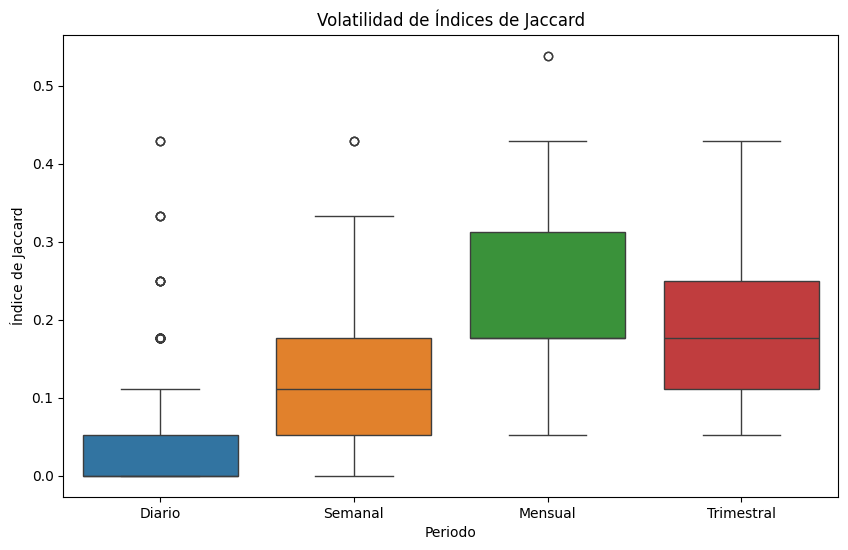

In [36]:
data = {
    'Diario': jaccard_indices_d,
    'Semanal': jaccard_indices_w,
    'Mensual': jaccard_indices_m,
    'Trimestral': jaccard_indices_q
}

# Crear DataFrame
df = pd.DataFrame(data)

# Análisis de Volatilidad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Volatilidad de Índices de Jaccard')
plt.xlabel('Periodo')
plt.ylabel('Índice de Jaccard')
plt.show()

In [17]:
min_year = dataset_fw['Fecha_Publicacion'].dt.year.min()
max_year = dataset_fw['Fecha_Publicacion'].dt.year.max()
print(min_year, max_year)

2021 2024


In [ ]:
# https://ts.gluon.ai/stable/
# https://ts.gluon.ai/stable/tutorials/forecasting/quick_start_tutorial.html

## TF-IDF temporal
Calcula cuánto se destaca una palabra en un periodo con respecto al resto.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs_by_month = [' '.join(tokens) for tokens in grouped_data_month]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs_by_month)

feature_names = np.array(vectorizer.get_feature_names_out())

for i, periodo in enumerate(grouped_data_month.index):
    row = tfidf_matrix[i].toarray()[0]
    top_indices = row.argsort()[-10:][::-1]
    print(f"\n{periodo}:")
    for idx in top_indices:
        print(f"  {feature_names[idx]}: {row[idx]:.4f}")


2021-11-30 00:00:00:
  2021: 0.2390
  presidente: 0.1551
  ministerio: 0.1534
  lasso: 0.1349
  proyecto: 0.1288
  empresa: 0.1282
  caso: 0.1220
  reforma: 0.1192
  primero: 0.1052
  asamblea: 0.1030

2021-12-31 00:00:00:
  2021: 0.2885
  caso: 0.2137
  primero: 0.1300
  ministerio: 0.1183
  empresa: 0.1177
  deber: 0.1161
  mes: 0.1122
  sector: 0.1083
  presidente: 0.1066
  solo: 0.0999

2022-01-31 00:00:00:
  2021: 0.2532
  caso: 0.1911
  enero: 0.1825
  proyecto: 0.1215
  deber: 0.1172
  empresa: 0.1134
  ministerio: 0.1123
  proceso: 0.1080
  primero: 0.1069
  presidente: 0.1004

2022-02-28 00:00:00:
  presidente: 0.1496
  proyecto: 0.1471
  caso: 0.1433
  2021: 0.1407
  ley: 0.1407
  corte: 0.1280
  consejo: 0.1084
  primero: 0.1078
  asamblea: 0.1078
  lasso: 0.1046

2022-03-31 00:00:00:
  caso: 0.1943
  ley: 0.1599
  presidente: 0.1438
  asamblea: 0.1438
  2021: 0.1383
  empresa: 0.1337
  proyecto: 0.1282
  ministerio: 0.1181
  primero: 0.1135
  lasso: 0.1115

2022-04-30 00:0

In [6]:
from collections import defaultdict
import pandas as pd

def calcular_spike_score(grouped_data, periodo="Mensual", top_n=15):
    """
    Calcula el delta de frecuencia (spike score) para cada palabra entre periodos consecutivos.
    grouped_data: Serie con periodo como índice y lista de tokens como valores.
    periodo: Solo usado para imprimir título.
    top_n: Número de palabras con mayor spike a mostrar.
    """
    spike_scores = defaultdict(list)
    periodos = list(grouped_data.index)

    for i in range(1, len(grouped_data)):
        prev_tokens = grouped_data[periodos[i-1]]
        curr_tokens = grouped_data[periodos[i]]
        
        prev_counts = Counter(prev_tokens)
        curr_counts = Counter(curr_tokens)
 
        all_words = set(prev_counts.keys()).union(set(curr_counts.keys()))

        for word in all_words:
            prev_freq = prev_counts.get(word, 0)
            curr_freq = curr_counts.get(word, 0)
            delta = curr_freq / (prev_freq + 1) # evita división por cero
            if curr_freq >= 5: # filtra ruido por baja frecuencia
                spike_scores[word].append(delta)

    # Calcular promedio del spike por palabra
    avg_spikes = {word: np.mean(scores) for word, scores in spike_scores.items()}
    df_spikes = pd.DataFrame(avg_spikes.items(), columns=['Palabra', 'Spike_Score'])
    df_spikes = df_spikes.sort_values(by='Spike_Score', ascending=False).head(top_n)

    print(f"🔍 Top {top_n} palabras con mayor spike score ({periodo}):\n")
    print(df_spikes.to_string(index=False))
    return df_spikes


In [14]:
import plotly.express as px

def graficar_spike_score(df_spikes, periodo="Mensual"):
    """
    Grafica las palabras con mayor spike score usando Plotly.
    df_spikes: DataFrame con columnas ['Palabra', 'Spike_Score'].
    periodo: Nombre del periodo que se usó (ej. "Mensual").
    """
    fig = px.bar(
        df_spikes,
            x='Palabra',
            y='Spike_Score',
            text='Spike_Score',
            color='Spike_Score',
            color_continuous_scale='Inferno',
            title=f'Top Palabras con Mayor Spike Score ({periodo})'
    )

    fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
    fig.update_layout(
        xaxis_title='Palabra',
        yaxis_title='Spike Score',
        xaxis_tickangle=-45,
        coloraxis_colorbar=dict(title='Spike'),
        height=500
    )
    fig.show()

In [15]:
df_spike_mensual = calcular_spike_score(grouped_data_month, periodo="Mensual", top_n=20)
graficar_spike_score(df_spike_mensual, periodo="Mensual")


🔍 Top 20 palabras con mayor spike score (Mensual):

    Palabra  Spike_Score
       gaza    52.129215
     murcia    45.000000
    padilla    38.602564
     casino    38.000000
      queda    35.546512
      hamas    33.360902
      araus    33.000000
     sancho    33.000000
       hama    32.609122
   exequial    32.000000
        glf    31.000000
   14122023    27.000000
  gangotena    27.000000
        svb    27.000000
   23112023    27.000000
   16052023    26.000000
    natalia    26.000000
        bnf    26.000000
      toque    25.552020
westminster    25.000000
